In [1]:
import pandas as pd
import numpy as np
import os
import pydicom
import matplotlib.pyplot as plt
from skimage.io import imread
import seaborn as sns
from glob import glob
import ipywidgets as widgets
import scipy.ndimage as ndimage
import imageio
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go


In [7]:


filePath = '/Applications/tez/tez_data/ADNI/002_S_1261/Axial_DTI_AP_Phase_TRACEW/2017-03-15_11_52_35.0/I831075/'



In [8]:
####  Mosaic Picturess  ####

paths = os.listdir(filePath)

paths.sort()

len(paths)

80

In [9]:
#Reading a DICOM Image
picture = pydicom.read_file(filePath + paths[50])


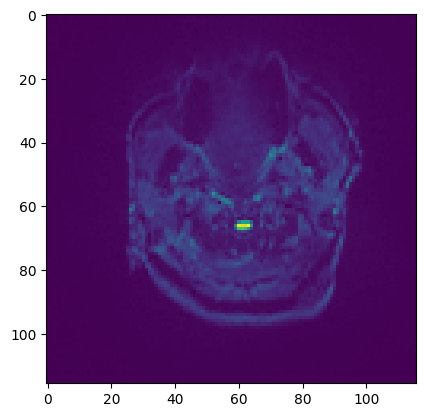

In [10]:
plt.imshow(picture.pixel_array)

In [11]:
pictures_vol = imageio.volread(filePath + paths[0])
print(pictures_vol.shape)
type(pictures_vol)

Reading DICOM (examining files): 1/80 files (1.2%80/80 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 80/80  (100.0%)
(80, 116, 116)


imageio.core.util.Array

In [12]:
#Access the first slice
pictures_vol[:,:,:]
m0,m1,m2 = pictures_vol.shape

In [13]:
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,m0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.

def axial_slicer(axial_slice=50):
  
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  
  plt.imshow(pictures_vol[axial_slice,:,:])
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='hot')
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='RdBu')


  # Don't show the axis
  plt.axis('off')
  plt.title("Trace Pictures")

interactive(children=(IntSlider(value=50, description='axial_slice', max=79), Output()), _dom_classes=('widget…

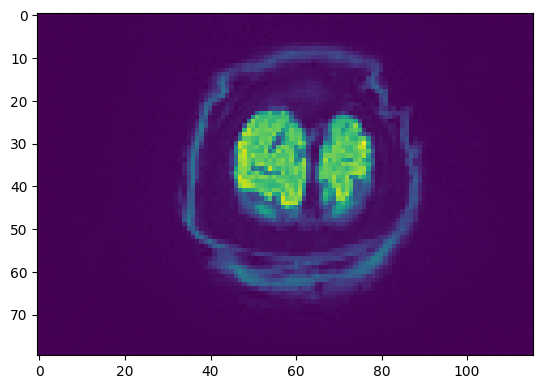

In [14]:
plt.imshow(pictures_vol[:,100,:])

In [15]:
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,m1-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.

def axial_slicer(axial_slice=50):
  
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  
  plt.imshow(pictures_vol[:,axial_slice,:])
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='hot')
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='RdBu')


  # Don't show the axis
  plt.axis('off')
  plt.title("Trace Pictures")

interactive(children=(IntSlider(value=50, description='axial_slice', max=115), Output()), _dom_classes=('widge…

In [18]:
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,m0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.

def axial_slicer(axial_slice=50):
  
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  
  plt.imshow(pictures_vol[axial_slice,:,:])
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='hot')
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='RdBu')


  # Don't show the axis
  plt.axis('off')
  plt.title("Trace Pictures")

interactive(children=(IntSlider(value=50, description='axial_slice', max=79), Output()), _dom_classes=('widget…

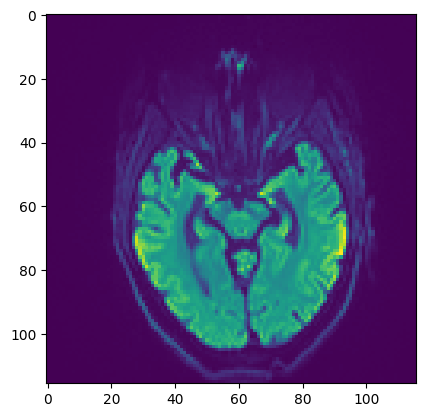

In [43]:
plt.imshow(pictures_vol[34,:,:])

In [44]:
max = np.max(pictures_vol[34,:,:])
min = np.min(pictures_vol[34,:,:])

print(max), print(min)

2434
0


(None, None)

In [45]:
mask = pictures_vol[34,:,:] > 850

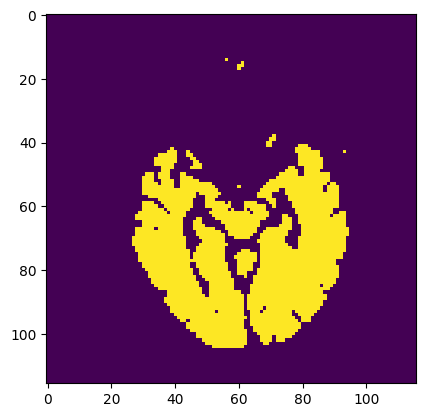

In [46]:
plt.imshow(mask)

In [47]:
masked_img = mask * pictures_vol[34,:,:]

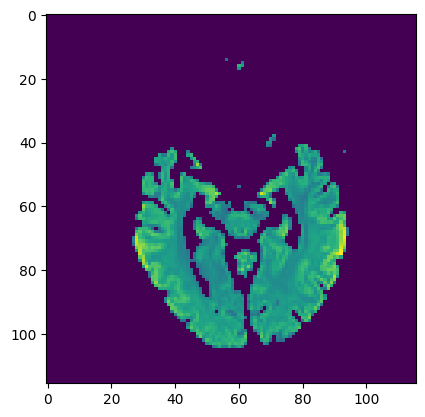

In [48]:
plt.imshow(masked_img)

In [86]:
mask_vol = pictures_vol > 1204

In [87]:
masked_img_vol = mask_vol * pictures_vol

In [88]:
z0 ,z1, z2 = masked_img_vol.shape

In [89]:
# slices along the axial plane, n0=99.
@widgets.interact(axial_slice=(0,z0-1))
# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice
# using the slider.

def axial_slicer(axial_slice=50):
  
  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  
  plt.imshow(masked_img_vol[axial_slice,:,:])
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='hot')
  #plt.imshow(mosaic_pictures_vol[axial_slice,:,:], cmap='RdBu')


  # Don't show the axis
  plt.axis('off')
  plt.title("Trace Pictures")

interactive(children=(IntSlider(value=50, description='axial_slice', max=79), Output()), _dom_classes=('widget…

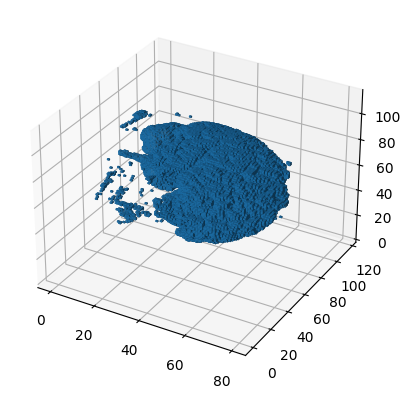

In [90]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(masked_img_vol)
plt.show()

In [81]:
masked_img_vol.shape

(80, 116, 116)